# Deep Learning for Diabetes Detection Using Kolmogorov-Arnold Networks
## By Erin Gregoire, Daniel Viola, & Dawson Damuth
### July 2025

In [1]:
%pip install kagglehub

import kagglehub

path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

Note: you may need to restart the kernel to use updated packages.


100%|█████████████████████████████████████████████████████████████████████████████| 6.03M/6.03M [00:00<00:00, 26.3MB/s]

Extracting files...


In [3]:
import pandas as pd
import os

files = os.listdir(path)
print("Files in dataset directory:", files)

#Loading the binarized dataset
data = pd.read_csv(os.path.join(path, files[2]))
display(data)

data.isna().sum()

Files in dataset directory: ['diabetes_012_health_indicators_BRFSS2015.csv', 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv']


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null

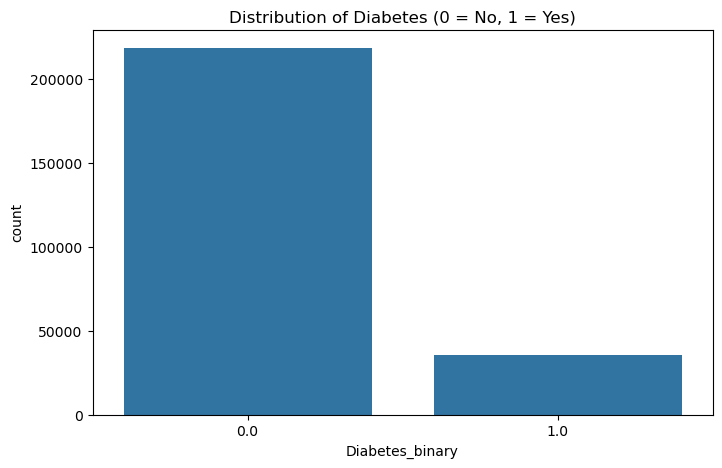

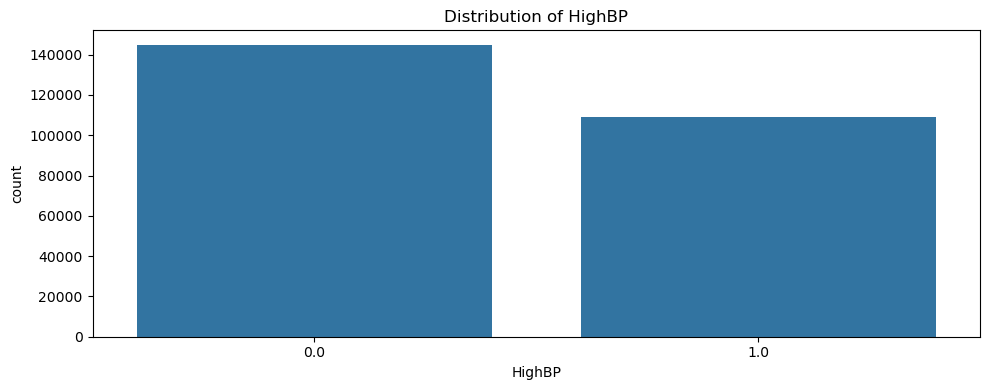

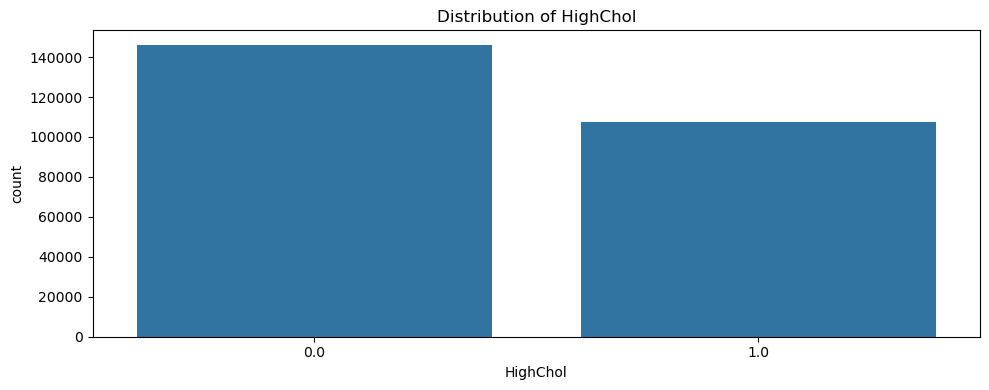

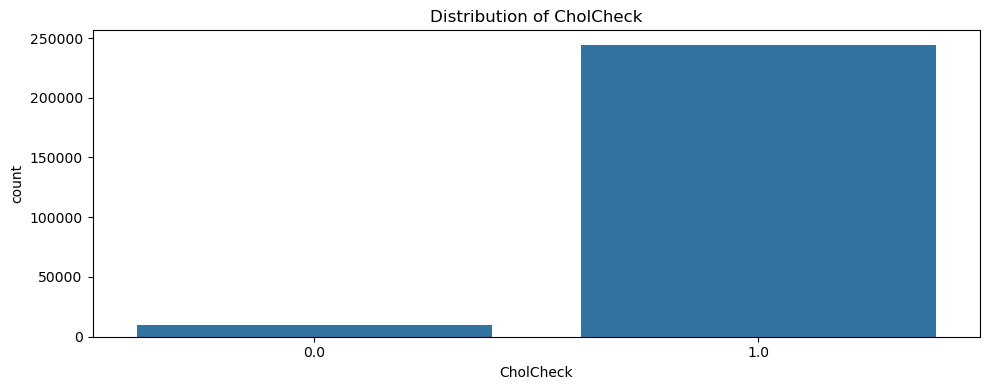

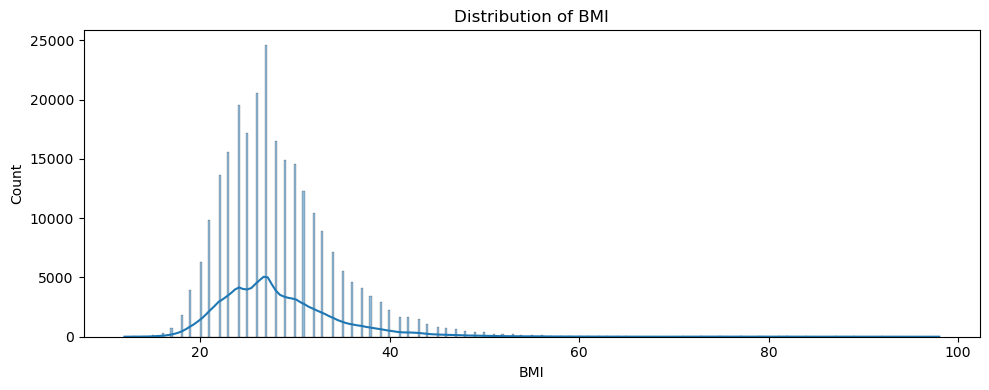

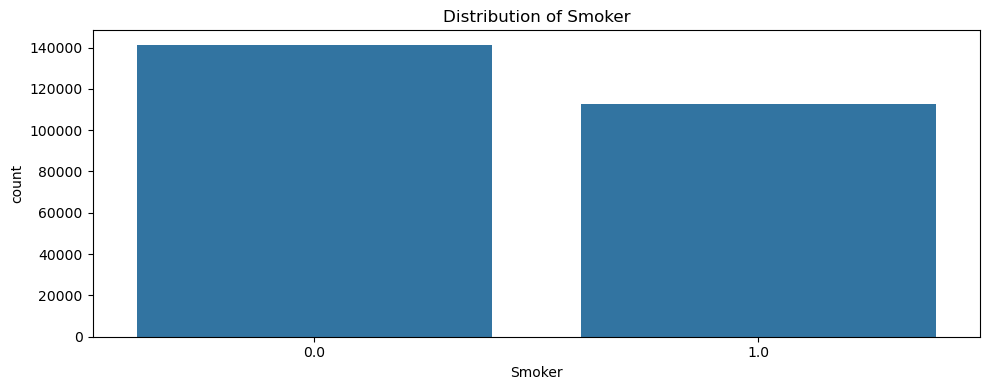

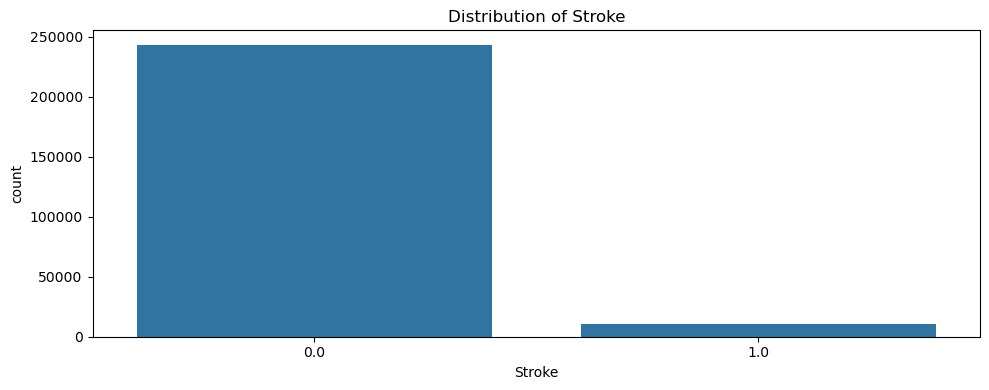

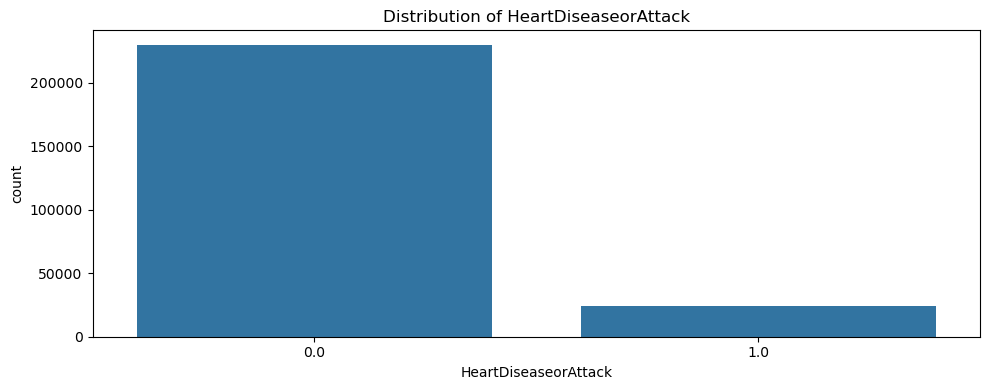

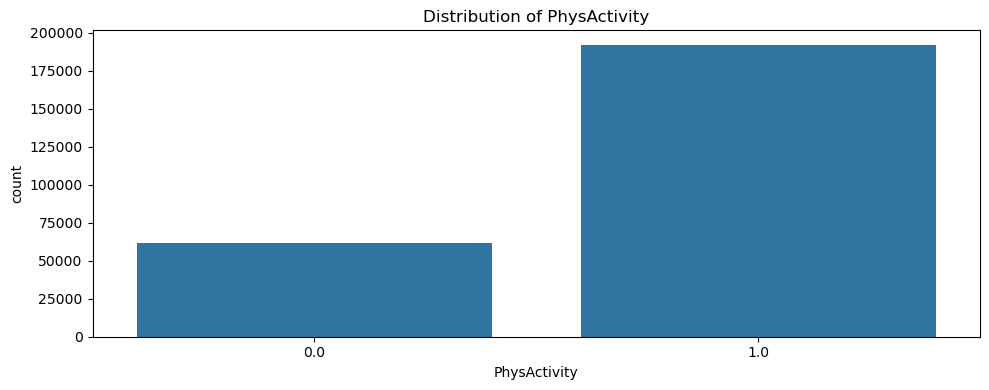

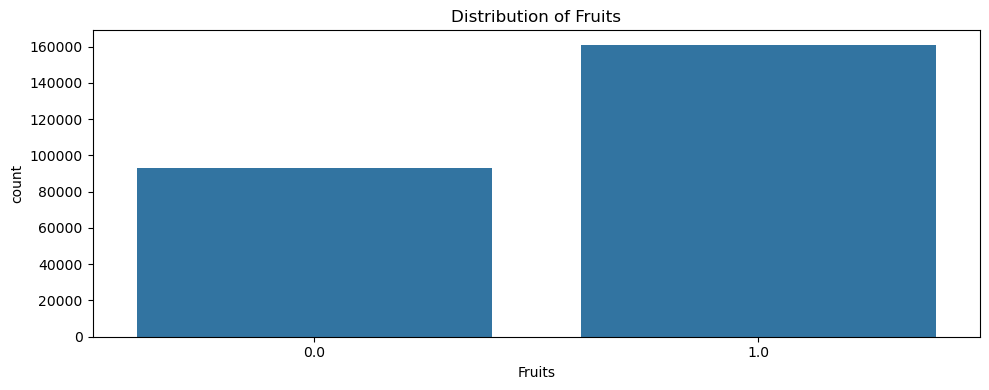

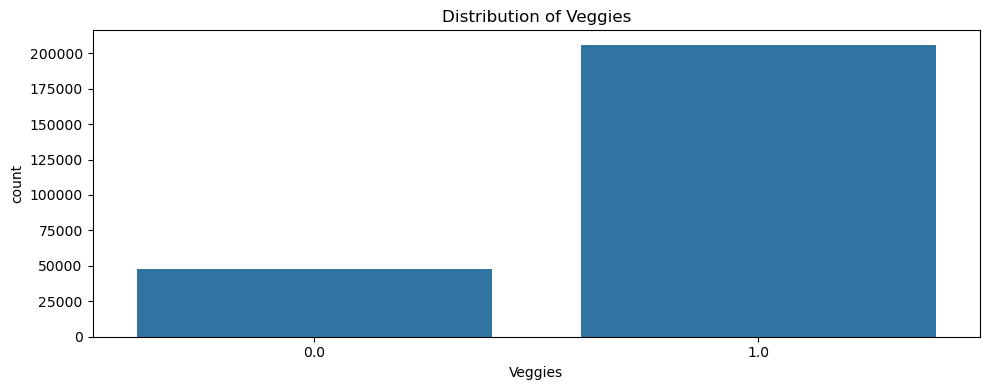

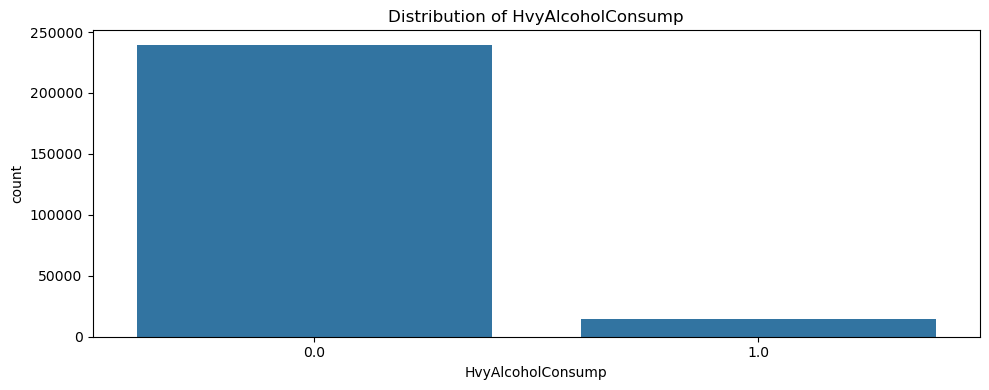

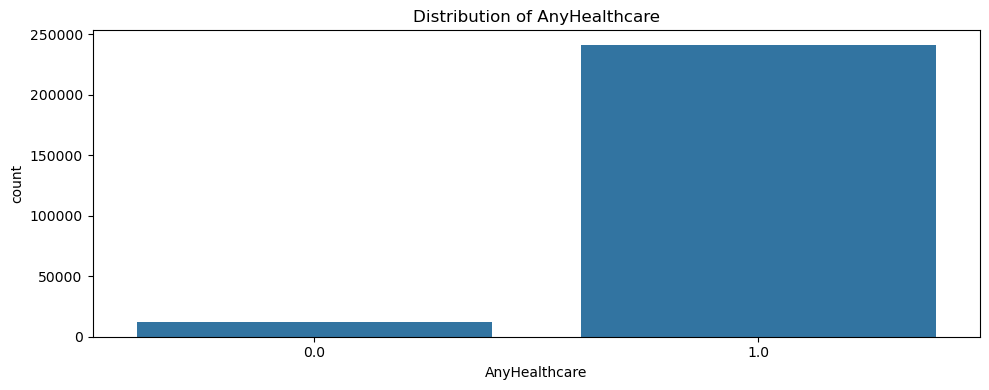

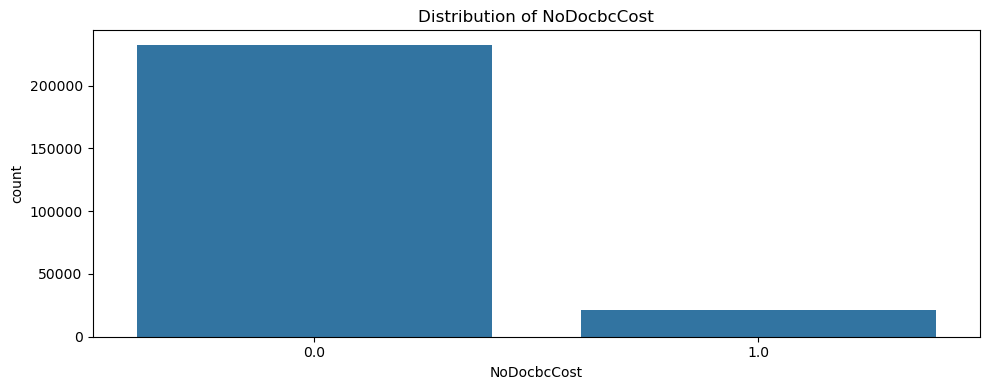

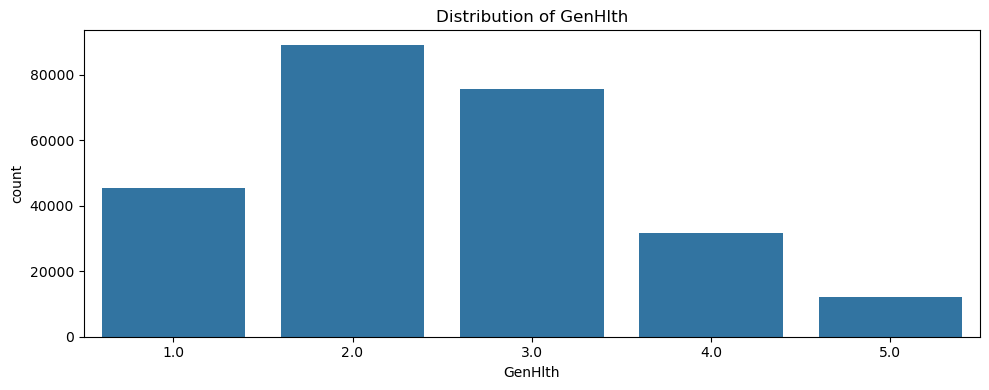

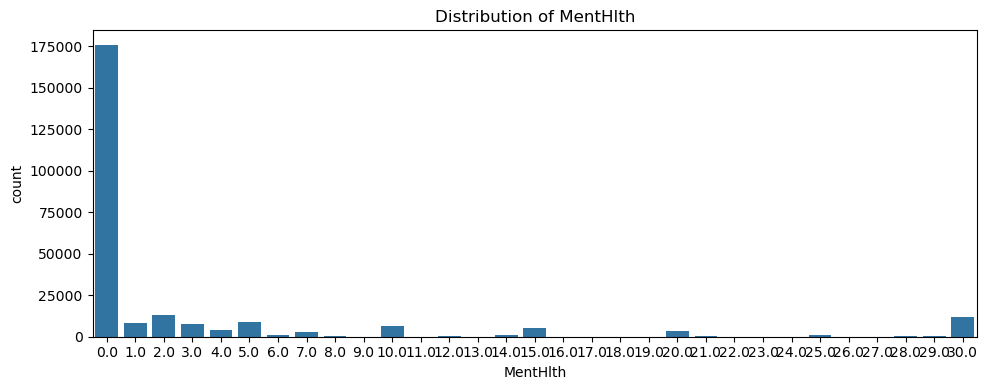

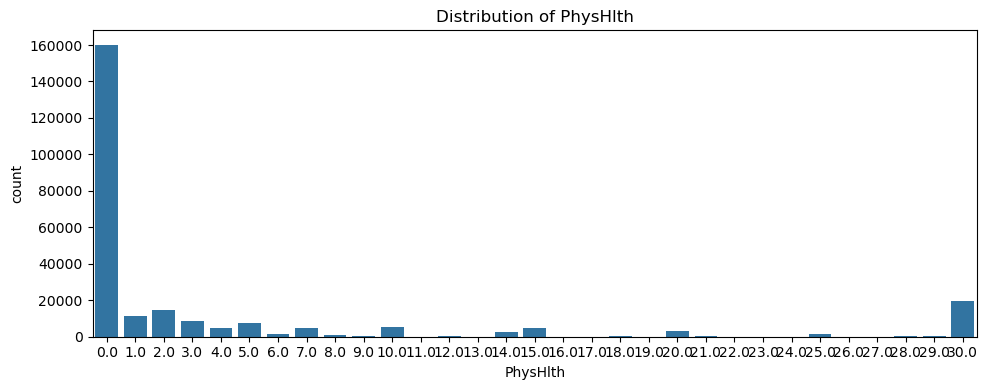

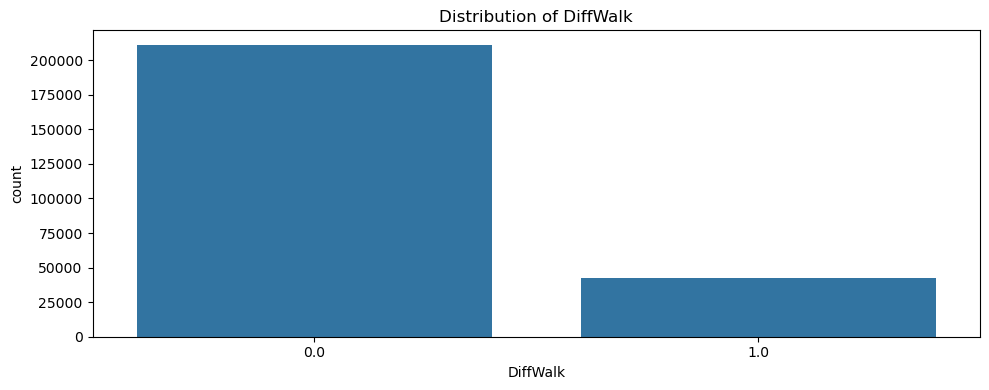

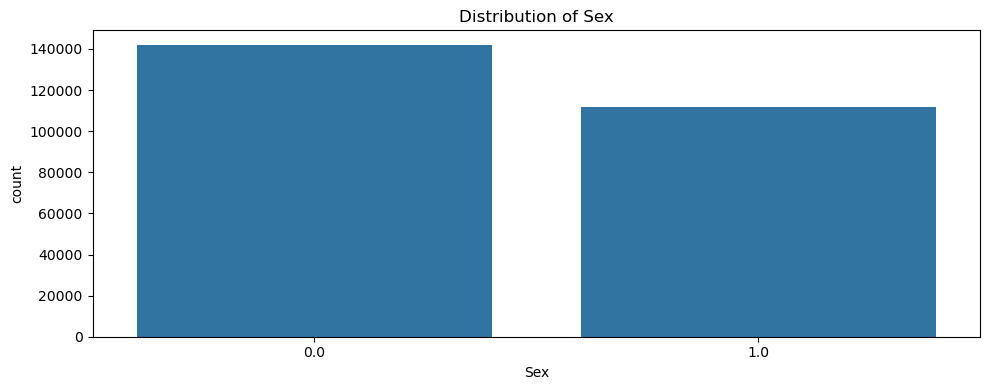

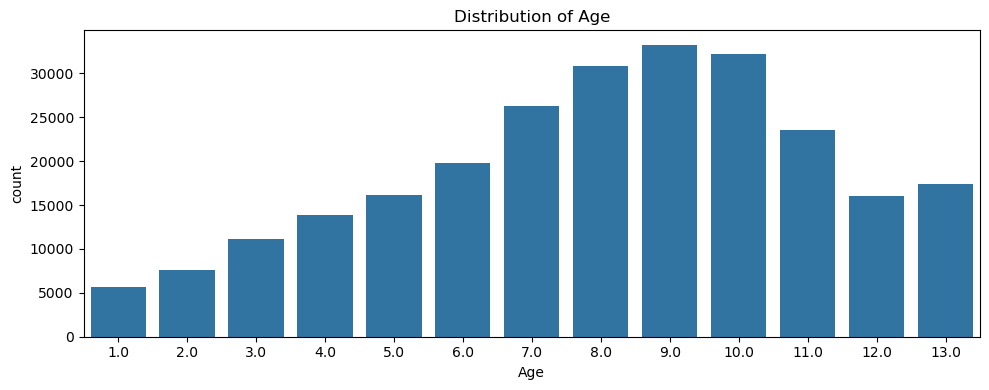

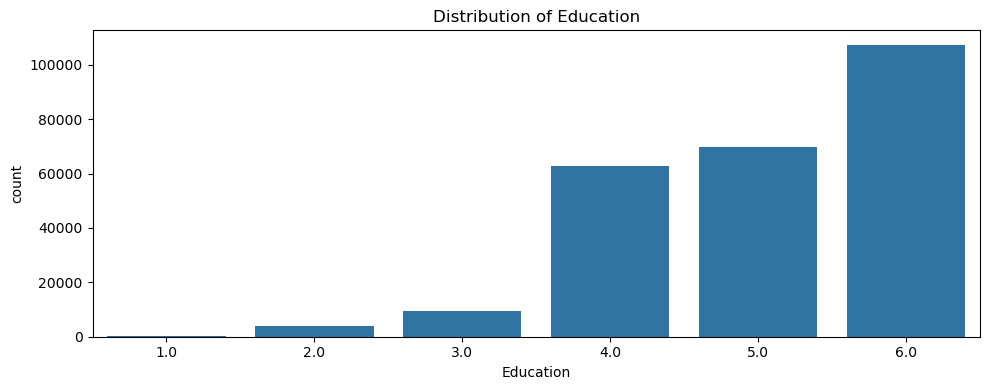

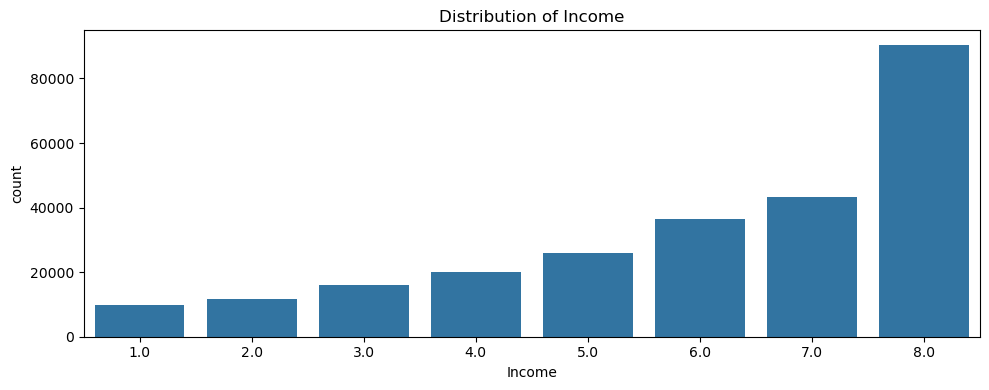

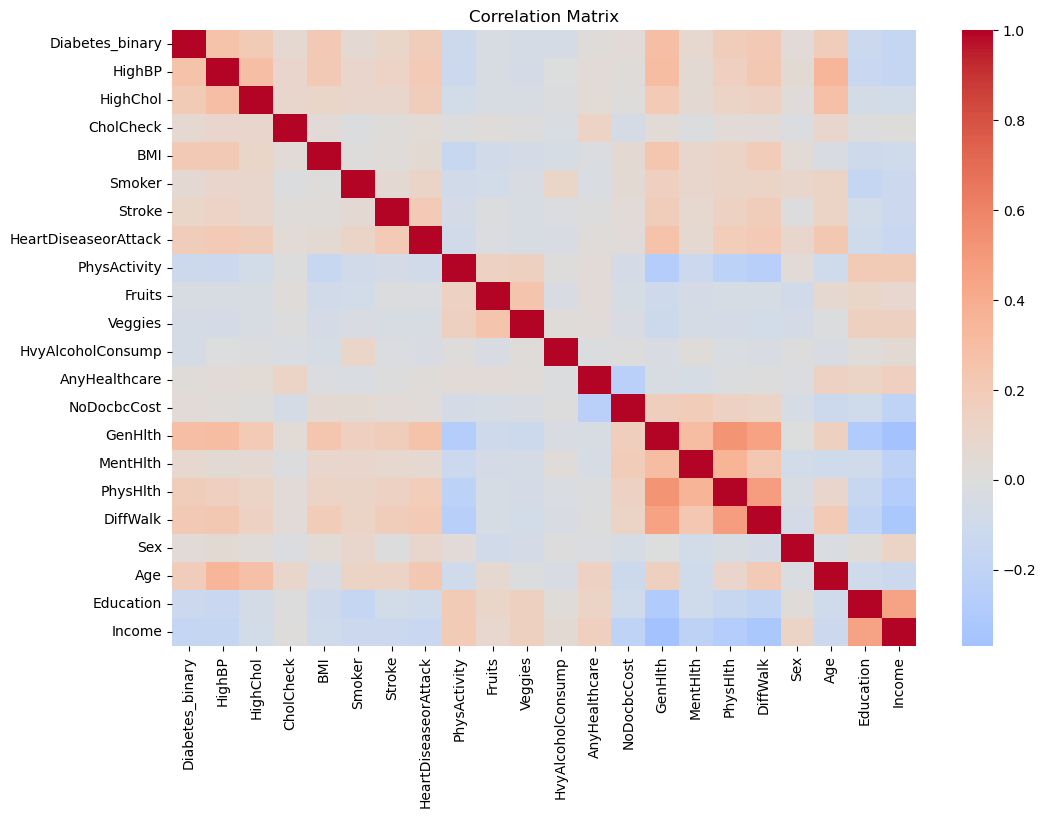

Training samples: 202944
Test samples: 25368
Validation samples: 25368
Input features dimension: 30


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import torch
from torch.utils.data import DataLoader, TensorDataset

print("\nData Summary:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_binary', data=data)
plt.title('Distribution of Diabetes (0 = No, 1 = Yes)')
plt.show()

for col in data.columns:
    if col != 'Diabetes_binary':
        plt.figure(figsize=(10, 4))
        if data[col].dtype in ['int64', 'float64']:
            if col in ['BMI']:
                sns.histplot(data[col], kde=True)
                plt.title(f'Distribution of {col}')
            else:
                sns.countplot(x=col, data=data)
                plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                   'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                   'NoDocbcCost', 'DiffWalk', 'Sex']
categorical_features = ['Education', 'Income']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

X_processed = preprocessor.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_processed, y, test_size=0.2, random_state=676, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=676, stratify=y_temp)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

batch_size = 64

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(X_train_tensor)}")
print(f"Test samples: {len(X_test_tensor)}")
print(f"Validation samples: {len(X_val_tensor)}")
print(f"Input features dimension: {X_train_tensor.shape[1]}")
